Participants: Asaf Zafrir & Eliya Samary


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

drive.mount('/content/drive', force_remount=True)
gdrive_path = "/content/drive" + "/My Drive"
# Google_apps_df = pd.read_csv(gdrive_path + "/Google-Playstore.csv")
# Apple_apps_df = pd.read_csv(gdrive_path + "/appleAppData.csv")

# Loading Goggle Dataset
Google_apps_df = pd.read_csv(gdrive_path + "/raw_dataset1.csv")

# Loading Apple Dataset
Apple_apps_df = pd.read_csv(gdrive_path + "/raw_dataset2.csv")

# Google_apps_df = pd.read_csv("Google-Playstore.csv")
# Apple_apps_df = pd.read_csv("appleAppData.csv")

Mounted at /content/drive


# **Introduction:** Datasets Details



We delve into two comprehensive datasets that provide data on **Google and Apple app stores**. These datasets offer information about smartphone applications, encompassing essential metrics such as download counts, user ratings, categories, and more.

In [ ]:
data_types = Google_apps_df.dtypes
print(data_types)

App Name_google              object
App_Id                       object
Category_google              object
Rating_google               float64
Rating Count_google         float64
Installs_google              object
Minimum Installs_google     float64
Maximum Installs_google       int64
Free_google                    bool
Price_google                float64
Currency_google              object
Size_google                  object
Minimum Android_google       object
Developer Id_google          object
Developer Website_google     object
Developer Email_google       object
Released_google              object
Last Updated_google          object
Content Rating_google        object
Privacy Policy_google        object
Ad Supported_google            bool
In App Purchases_google        bool
Editors Choice_google          bool
Scraped Time_google          object
dtype: object


In [ ]:
data_types = Apple_apps_df.dtypes
print(data_types)

App_Id                            object
App_Name_apple                    object
AppStore_Url_apple                object
Primary_Genre_apple               object
Content_Rating_apple              object
Size_Bytes_apple                 float64
Required_IOS_Version_apple        object
Released_apple                    object
Updated_apple                     object
Version_apple                     object
Price_apple                      float64
Currency_apple                    object
Free_apple                          bool
DeveloperId_apple                  int64
Developer_apple                   object
Developer_Url_apple               object
Developer_Website_apple           object
Average_User_Rating_apple        float64
Reviews_apple                      int64
Current_Version_Score_apple      float64
Current_Version_Reviews_apple      int64
dtype: object


In [ ]:
print("\033[1mGoogle App Store Dataset:\033[0m")
print("\033[1mGoogle Info:\033[0m")
print(Google_apps_df.info())
print("\033[1mGoogle Describe:\033[0m")
print(Google_apps_df.describe())
print("-----------------------------------------------------------------\n")
print("\033[1mApple App Store Dataset:\033[0m")
print("\033[1mApple Info:\033[0m")
print(Apple_apps_df.info())
print("\033[1mApple Describe:\033[0m")
print(Apple_apps_df.describe())


Google App Store Dataset:
Google Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   App Name_google           object 
 1   App_Id                    object 
 2   Category_google           object 
 3   Rating_google             float64
 4   Rating Count_google       float64
 5   Installs_google           object 
 6   Minimum Installs_google   float64
 7   Maximum Installs_google   int64  
 8   Free_google               bool   
 9   Price_google              float64
 10  Currency_google           object 
 11  Size_google               object 
 12  Minimum Android_google    object 
 13  Developer Id_google       object 
 14  Developer Website_google  object 
 15  Developer Email_google    object 
 16  Released_google           object 
 17  Last Updated_google       object 
 18  Content Rating_google     object 
 19  Privacy Policy_google   

In [ ]:
print("Number of rows (Google):", len(Google_apps_df))
print("Number of rows (Apple):", len(Apple_apps_df))

Number of rows (Google): 2312944
Number of rows (Apple): 1230376


# **Section 1:** Preprocessing
In this phase, we undertake a series of data preparation steps to ensure that our dataset is ready for analysis

## Standardizing Column Names
To differentiate between features from the Google and Apple datasets after merging, we added a suffix indicating their respective sources: "google" and "apple." This helps distinguish between the two sets of data.

In [ ]:
for column in Google_apps_df.columns:
    if column != 'App Id':
      Google_apps_df.rename(columns={column: column + '_google'}, inplace=True)
for column in Apple_apps_df.columns:
    if column != 'App_Id':
      Apple_apps_df.rename(columns={column: column + '_apple'}, inplace=True)

In [ ]:
print(Apple_apps_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230376 entries, 0 to 1230375
Data columns (total 21 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   App_Id                         1230376 non-null  object 
 1   App_Name_apple                 1230375 non-null  object 
 2   AppStore_Url_apple             1230376 non-null  object 
 3   Primary_Genre_apple            1230376 non-null  object 
 4   Content_Rating_apple           1230376 non-null  object 
 5   Size_Bytes_apple               1230152 non-null  float64
 6   Required_IOS_Version_apple     1230376 non-null  object 
 7   Released_apple                 1230373 non-null  object 
 8   Updated_apple                  1230376 non-null  object 
 9   Version_apple                  1230376 non-null  object 
 10  Price_apple                    1229886 non-null  float64
 11  Currency_apple                 1230376 non-null  object 
 12  Free_apple    

In [ ]:
print(Google_apps_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   App Name_google           object 
 1   App Id                    object 
 2   Category_google           object 
 3   Rating_google             float64
 4   Rating Count_google       float64
 5   Installs_google           object 
 6   Minimum Installs_google   float64
 7   Maximum Installs_google   int64  
 8   Free_google               bool   
 9   Price_google              float64
 10  Currency_google           object 
 11  Size_google               object 
 12  Minimum Android_google    object 
 13  Developer Id_google       object 
 14  Developer Website_google  object 
 15  Developer Email_google    object 
 16  Released_google           object 
 17  Last Updated_google       object 
 18  Content Rating_google     object 
 19  Privacy Policy_google     object 
 20  Ad Supported_google     


## Data Combination

We opted to merge datasets based on the "App_Id" rather than the "App_Name" to ensure reliability and accuracy of our analysis while minimizing the risk of data mismatching.


In [ ]:
Google_apps_df.rename(columns={'App Id': 'App_Id'}, inplace=True)
merged_df = pd.merge(Google_apps_df, Apple_apps_df, on='App_Id', how='inner')

In [ ]:
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216780 entries, 0 to 216779
Data columns (total 44 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   App Name_google                216779 non-null  object 
 1   App_Id                         216780 non-null  object 
 2   Category_google                216780 non-null  object 
 3   Rating_google                  215794 non-null  float64
 4   Rating Count_google            215794 non-null  float64
 5   Installs_google                216748 non-null  object 
 6   Minimum Installs_google        216748 non-null  float64
 7   Maximum Installs_google        216780 non-null  int64  
 8   Free_google                    216780 non-null  bool   
 9   Price_google                   216780 non-null  float64
 10  Currency_google                216744 non-null  object 
 11  Size_google                    216775 non-null  object 
 12  Minimum Android_google        

## Handeling null values
Handling Null Values with Precision - handling null values by leveraging the "dropna" function.

In [ ]:
df_cleaned = merged_df.dropna()

In [ ]:
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 97183 entries, 2 to 216777
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   App Name_google                97183 non-null  object 
 1   App_Id                         97183 non-null  object 
 2   Category_google                97183 non-null  object 
 3   Rating_google                  97183 non-null  float64
 4   Rating Count_google            97183 non-null  float64
 5   Installs_google                97183 non-null  object 
 6   Minimum Installs_google        97183 non-null  float64
 7   Maximum Installs_google        97183 non-null  int64  
 8   Free_google                    97183 non-null  bool   
 9   Price_google                   97183 non-null  float64
 10  Currency_google                97183 non-null  object 
 11  Size_google                    97183 non-null  object 
 12  Minimum Android_google         97183 non-null  obj

## Reordering Columns

rearranged the columns across both Google and Apple app store datasets. This strategic reordering ensures that columns with identical names, existing in both datasets, are positioned adjacent to each other.

In [ ]:
desired_column_order = ['App_Id', 'App Name_google', 'App_Name_apple', 'Free_google',
                        'Free_apple','Price_google','Price_apple', 'Category_google','Primary_Genre_apple',
                        'Released_google', 'Released_apple', 'Last Updated_google','Updated_apple',
                        'Size_google','Size_Bytes_apple','Rating_google', 'Rating Count_google',
                        'Content_Rating_apple', 'Currency_google','Currency_apple', 'Developer Id_google',
                        'DeveloperId_apple', 'Content Rating_google','Installs_google', 'Minimum Installs_google',
                        'Average_User_Rating_apple', 'Reviews_apple', 'Ad Supported_google',  'Minimum Android_google',
                        'Developer Website_google', 'Developer Email_google', 'Privacy Policy_google', 'In App Purchases_google',
                        'Editors Choice_google', 'Scraped Time_google', 'Maximum Installs_google', 'AppStore_Url_apple',
                        'Required_IOS_Version_apple', 'Version_apple', 'Developer_apple', 'Developer_Url_apple',
                        'Developer_Website_apple', 'Current_Version_Score_apple', 'Current_Version_Reviews_apple']
df_cleaned = df_cleaned[desired_column_order]

In [ ]:
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 97183 entries, 2 to 216777
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   App_Id                         97183 non-null  object 
 1   App Name_google                97183 non-null  object 
 2   App_Name_apple                 97183 non-null  object 
 3   Free_google                    97183 non-null  bool   
 4   Free_apple                     97183 non-null  bool   
 5   Price_google                   97183 non-null  float64
 6   Price_apple                    97183 non-null  float64
 7   Category_google                97183 non-null  object 
 8   Primary_Genre_apple            97183 non-null  object 
 9   Released_google                97183 non-null  object 
 10  Released_apple                 97183 non-null  object 
 11  Last Updated_google            97183 non-null  object 
 12  Updated_apple                  97183 non-null  obj

## Remove Unnecessary Features  
streamlined the dataset by removing unnecessary attributes.

In [ ]:
columns_to_remove = ['Last Updated_google', 'Updated_apple', 'Currency_google','Currency_apple',
                     'Installs_google', 'Developer Website_google', 'Developer Email_google', 'Privacy Policy_google',
                     'Scraped Time_google', 'AppStore_Url_apple', 'Required_IOS_Version_apple', 'Version_apple',
                     'Developer_apple', 'Developer_Url_apple', 'Developer_Website_apple', 'Current_Version_Score_apple', 'Current_Version_Reviews_apple']
df_cleaned.drop(columns=columns_to_remove, inplace=True)

In [ ]:
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 97183 entries, 2 to 216777
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   App_Id                     97183 non-null  object 
 1   App Name_google            97183 non-null  object 
 2   App_Name_apple             97183 non-null  object 
 3   Free_google                97183 non-null  bool   
 4   Free_apple                 97183 non-null  bool   
 5   Price_google               97183 non-null  float64
 6   Price_apple                97183 non-null  float64
 7   Category_google            97183 non-null  object 
 8   Primary_Genre_apple        97183 non-null  object 
 9   Released_google            97183 non-null  object 
 10  Released_apple             97183 non-null  object 
 11  Size_google                97183 non-null  object 
 12  Size_Bytes_apple           97183 non-null  float64
 13  Rating_google              97183 non-null  float64

## Converted Data Types





**'Total_rating'**: Created as a new column by adding 'Rating_google' and 'Average_User_Rating_apple', and then converted to numeric.

**'Date_google_agg' and 'Date_apple_agg'**: Converted to quarter-year format ('Q{quarter} {year}') using custom function quarter_of_year.

In [ ]:
def convert_to_gigabyte(match):
  value = float(match.group(1)) * 1000000000
  return str(int(value))

def convert_to_megabyte(match):
  value = float(match.group(1)) * 1000000
  return str(int(value))

def convert_to_kilobyte(match):
  value = float(match.group(1)) * 1000
  return str(int(value))

df_cleaned['Price_google'] = pd.to_numeric(df_cleaned['Price_google'])
df_cleaned['Price_apple'] = pd.to_numeric(df_cleaned['Price_apple'])
df_cleaned['Size_google'] = df_cleaned['Size_google'].str.replace(',', '')

df_cleaned['Size_google'] = df_cleaned['Size_google'].str.replace(r'(\d+(\.\d+)?)G', lambda x: convert_to_gigabyte(x), regex=True)
df_cleaned['Size_google'] = df_cleaned['Size_google'].str.replace(r'(\d+(\.\d+)?)M', lambda x: convert_to_megabyte(x), regex=True)
df_cleaned['Size_google'] = df_cleaned['Size_google'].str.replace(r'(\d+(\.\d+)?)k', lambda x: convert_to_kilobyte(x), regex=True)
df_cleaned['Size_google'] = df_cleaned['Size_google'].replace('Varies with device', '0')

df_cleaned['Size_google'] = pd.to_numeric(df_cleaned['Size_google'])
df_cleaned['Size_Bytes_apple'] = pd.to_numeric(df_cleaned['Size_Bytes_apple'])
df_cleaned['Rating_google'] = pd.to_numeric(df_cleaned['Rating_google'])
df_cleaned['Rating Count_google'] = pd.to_numeric(df_cleaned['Rating Count_google'])
df_cleaned['Minimum Installs_google'] = pd.to_numeric(df_cleaned['Minimum Installs_google'])
df_cleaned['Maximum Installs_google'] = pd.to_numeric(df_cleaned['Maximum Installs_google'])
df_cleaned['Average_User_Rating_apple'] = pd.to_numeric(df_cleaned['Average_User_Rating_apple'])
df_cleaned['Reviews_apple'] = pd.to_numeric(df_cleaned['Reviews_apple'])


In [ ]:
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 97183 entries, 2 to 216777
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   App_Id                     97183 non-null  object 
 1   App Name_google            97183 non-null  object 
 2   App_Name_apple             97183 non-null  object 
 3   Free_google                97183 non-null  bool   
 4   Free_apple                 97183 non-null  bool   
 5   Price_google               97183 non-null  float64
 6   Price_apple                97183 non-null  float64
 7   Category_google            97183 non-null  object 
 8   Primary_Genre_apple        97183 non-null  object 
 9   Released_google            97183 non-null  object 
 10  Released_apple             97183 non-null  object 
 11  Size_google                97183 non-null  int64  
 12  Size_Bytes_apple           97183 non-null  float64
 13  Rating_google              97183 non-null  float64

**'Price_google' and 'Price_apple':** Converted to numeric using pd.to_numeric.

**'Size_google':** Converted to numeric after processing size values and removing units ('G', 'M', 'k') using custom conversion functions (convert_to_gigabyte, convert_to_megabyte, convert_to_kilobyte) and replacing 'Varies with device' with '0'.

**'Size_Bytes_apple', 'Rating_google', 'Rating Count_google', 'Minimum Installs_google', 'Maximum Installs_google', 'Average_User_Rating_apple', 'Reviews_apple'**: Converted to numeric using pd.to_numeric.

In [ ]:
df_cleaned['Total_rating'] = df_cleaned['Rating_google'] + df_cleaned['Average_User_Rating_apple']
df_cleaned['Total_rating'] = pd.to_numeric(df_cleaned['Total_rating'])

In [ ]:
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 97183 entries, 2 to 216777
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   App_Id                     97183 non-null  object 
 1   App Name_google            97183 non-null  object 
 2   App_Name_apple             97183 non-null  object 
 3   Free_google                97183 non-null  bool   
 4   Free_apple                 97183 non-null  bool   
 5   Price_google               97183 non-null  float64
 6   Price_apple                97183 non-null  float64
 7   Category_google            97183 non-null  object 
 8   Primary_Genre_apple        97183 non-null  object 
 9   Released_google            97183 non-null  object 
 10  Released_apple             97183 non-null  object 
 11  Size_google                97183 non-null  int64  
 12  Size_Bytes_apple           97183 non-null  float64
 13  Rating_google              97183 non-null  float64

calculates the total rating by adding the **'Rating_google' and 'Average_User_Rating_apple'** columns together and assigns the result to a new column **'Total_rating'** .

converts **the 'Total_rating'** column to **numeric data typ**e using pd.to_numeric.

ensures that the total rating column is represented as **numerical values**

In [ ]:
from datetime import datetime

def parse_date(date_string):
    try:
        date = pd.to_datetime(date_string, format="%b %d, %Y")
    except ValueError:
        try:
            date = pd.to_datetime(date_string)
        except ValueError:
            return pd.NaT

    return date

def quarter_of_year(date):
  quarter = (date.month - 1) // 3 + 1
  return quarter

def num_of_year(date):
  return date.year

df_cleaned['Date_google_agg'] = df_cleaned['Released_google'].apply(parse_date)
df_cleaned['Date_apple_agg'] = df_cleaned['Released_apple'].apply(parse_date)

df_cleaned['Year_apple'] = df_cleaned['Date_apple_agg'].apply(num_of_year)
df_cleaned['Year_google'] = df_cleaned['Date_google_agg'].apply(num_of_year)

def quarter_of_year(date):
  quarter = (date.month - 1) // 3 + 1
  return quarter

def num_of_year(date):
  return date.year

df_cleaned['Date_google_agg'] = df_cleaned['Date_google_agg'].apply(quarter_of_year)
df_cleaned['Date_apple_agg'] = df_cleaned['Date_apple_agg'].apply(quarter_of_year)

df_cleaned['Year_apple'] = pd.to_numeric(df_cleaned['Year_apple'])
df_cleaned['Year_google'] = pd.to_numeric(df_cleaned['Year_google'])

In [ ]:
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 97183 entries, 2 to 216777
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   App_Id                     97183 non-null  object 
 1   App Name_google            97183 non-null  object 
 2   App_Name_apple             97183 non-null  object 
 3   Free_google                97183 non-null  bool   
 4   Free_apple                 97183 non-null  bool   
 5   Price_google               97183 non-null  float64
 6   Price_apple                97183 non-null  float64
 7   Category_google            97183 non-null  object 
 8   Primary_Genre_apple        97183 non-null  object 
 9   Released_google            97183 non-null  object 
 10  Released_apple             97183 non-null  object 
 11  Size_google                97183 non-null  int64  
 12  Size_Bytes_apple           97183 non-null  float64
 13  Rating_google              97183 non-null  float64

**'Released_google':** Converted to datetime objects and assigned to the new column **'Date_google_agg'.**
**'Released_apple':** Converted to datetime objects and assigned to the new column **'Date_apple_agg'.**

## Handling Missing Values

In [ ]:
df_cleaned.dropna(inplace=True)

In [ ]:
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 97183 entries, 2 to 216777
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   App_Id                     97183 non-null  object 
 1   App Name_google            97183 non-null  object 
 2   App_Name_apple             97183 non-null  object 
 3   Free_google                97183 non-null  bool   
 4   Free_apple                 97183 non-null  bool   
 5   Price_google               97183 non-null  float64
 6   Price_apple                97183 non-null  float64
 7   Category_google            97183 non-null  object 
 8   Primary_Genre_apple        97183 non-null  object 
 9   Released_google            97183 non-null  object 
 10  Released_apple             97183 non-null  object 
 11  Size_google                97183 non-null  int64  
 12  Size_Bytes_apple           97183 non-null  float64
 13  Rating_google              97183 non-null  float64

## Declare categorial features

In [ ]:
df_cleaned['Category_google'] = df_cleaned['Category_google'].astype("category")
df_cleaned['Primary_Genre_apple'] = df_cleaned['Primary_Genre_apple'].astype("category")

## Removing Duplicates

In [ ]:
df_cleaned.drop_duplicates(inplace=True)

In [ ]:
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 97183 entries, 2 to 216777
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   App_Id                     97183 non-null  object  
 1   App Name_google            97183 non-null  object  
 2   App_Name_apple             97183 non-null  object  
 3   Free_google                97183 non-null  bool    
 4   Free_apple                 97183 non-null  bool    
 5   Price_google               97183 non-null  float64 
 6   Price_apple                97183 non-null  float64 
 7   Category_google            97183 non-null  category
 8   Primary_Genre_apple        97183 non-null  category
 9   Released_google            97183 non-null  object  
 10  Released_apple             97183 non-null  object  
 11  Size_google                97183 non-null  int64   
 12  Size_Bytes_apple           97183 non-null  float64 
 13  Rating_google              97183 no

## Handling Outliers

In [ ]:
Q1 = df_cleaned['Rating_google'].quantile(0.25)
Q3 = df_cleaned['Rating_google'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned['Rating_google'] = df_cleaned['Rating_google'].clip(lower=lower_bound, upper=upper_bound)

In [ ]:
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 97183 entries, 2 to 216777
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   App_Id                     97183 non-null  object  
 1   App Name_google            97183 non-null  object  
 2   App_Name_apple             97183 non-null  object  
 3   Free_google                97183 non-null  bool    
 4   Free_apple                 97183 non-null  bool    
 5   Price_google               97183 non-null  float64 
 6   Price_apple                97183 non-null  float64 
 7   Category_google            97183 non-null  category
 8   Primary_Genre_apple        97183 non-null  category
 9   Released_google            97183 non-null  object  
 10  Released_apple             97183 non-null  object  
 11  Size_google                97183 non-null  int64   
 12  Size_Bytes_apple           97183 non-null  float64 
 13  Rating_google              97183 no

## Scaling Numerical Features

In [ ]:
scaler = MinMaxScaler()
df_cleaned['Size_google_scaled'] = scaler.fit_transform(df_cleaned[['Size_google']])

In [ ]:
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 97183 entries, 2 to 216777
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   App_Id                     97183 non-null  object  
 1   App Name_google            97183 non-null  object  
 2   App_Name_apple             97183 non-null  object  
 3   Free_google                97183 non-null  bool    
 4   Free_apple                 97183 non-null  bool    
 5   Price_google               97183 non-null  float64 
 6   Price_apple                97183 non-null  float64 
 7   Category_google            97183 non-null  category
 8   Primary_Genre_apple        97183 non-null  category
 9   Released_google            97183 non-null  object  
 10  Released_apple             97183 non-null  object  
 11  Size_google                97183 non-null  int64   
 12  Size_Bytes_apple           97183 non-null  float64 
 13  Rating_google              97183 no

## Remove Unnecessary Features (after merge)

In [ ]:
columns_to_remove = ['Size_google', 'Rating Count_google', 'Content_Rating_apple', 'Content Rating_google','Reviews_apple','Minimum Android_google']
df_cleaned.drop(columns=columns_to_remove, inplace=True)

In [ ]:
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 97183 entries, 2 to 216777
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   App_Id                     97183 non-null  object  
 1   App Name_google            97183 non-null  object  
 2   App_Name_apple             97183 non-null  object  
 3   Free_google                97183 non-null  bool    
 4   Free_apple                 97183 non-null  bool    
 5   Price_google               97183 non-null  float64 
 6   Price_apple                97183 non-null  float64 
 7   Category_google            97183 non-null  category
 8   Primary_Genre_apple        97183 non-null  category
 9   Released_google            97183 non-null  object  
 10  Released_apple             97183 non-null  object  
 11  Size_Bytes_apple           97183 non-null  float64 
 12  Rating_google              97183 non-null  float64 
 13  Developer Id_google        97183 no

## Load the new Dataset as "ready_dataset"

modified DataFrame:

In [ ]:
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 97183 entries, 2 to 216777
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   App_Id                     97183 non-null  object  
 1   App Name_google            97183 non-null  object  
 2   App_Name_apple             97183 non-null  object  
 3   Free_google                97183 non-null  bool    
 4   Free_apple                 97183 non-null  bool    
 5   Price_google               97183 non-null  float64 
 6   Price_apple                97183 non-null  float64 
 7   Category_google            97183 non-null  category
 8   Primary_Genre_apple        97183 non-null  category
 9   Released_google            97183 non-null  object  
 10  Released_apple             97183 non-null  object  
 11  Size_Bytes_apple           97183 non-null  float64 
 12  Rating_google              97183 non-null  float64 
 13  Developer Id_google        97183 no

In [ ]:
df_cleaned.to_csv("ready_dataset.csv", index=False)
df_ready = pd.read_csv("ready_dataset.csv")

# **Section 2:** Data Analysis

## Features Distribution

### Distrbution of Prices

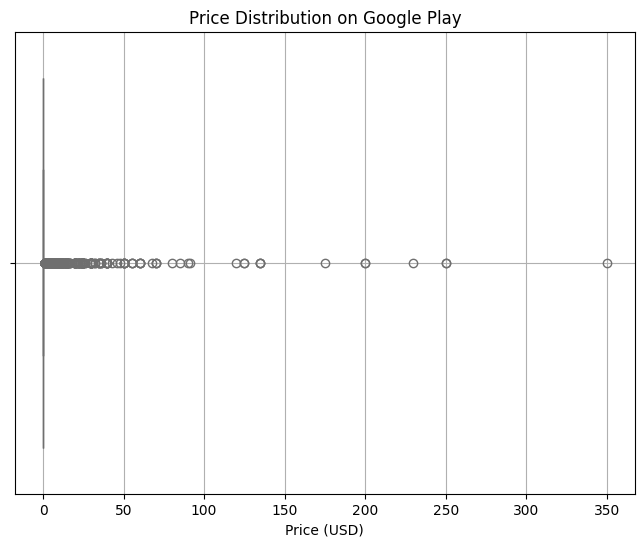

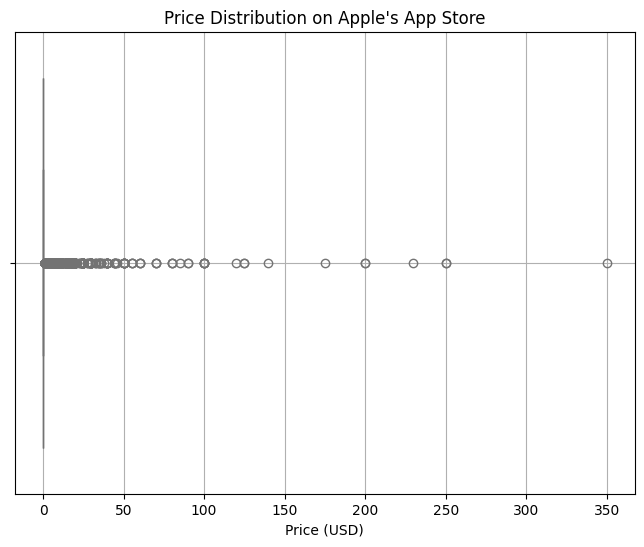

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_ready, x='Price_google', color='skyblue')
plt.xlabel('Price (USD)')
plt.title('Price Distribution on Google Play')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_ready, x='Price_apple', color='lightgreen')
plt.xlabel('Price (USD)')
plt.title("Price Distribution on Apple's App Store")
plt.grid(True)
plt.show()


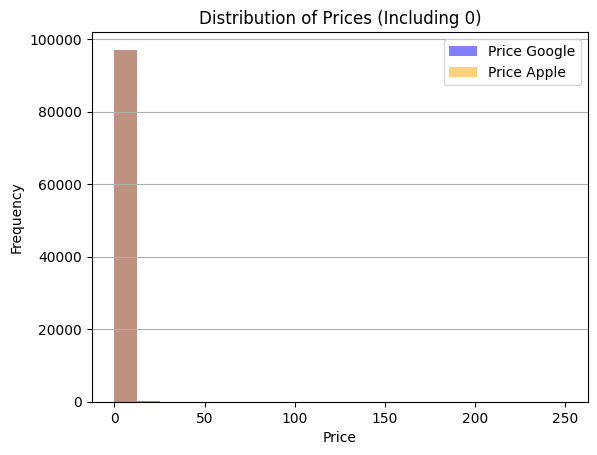

In [ ]:
plt.hist(df_ready['Price_google'], bins=20, range=(0, 250), alpha=0.5, label='Price Google', color='blue')

# Plot histogram for 'Price_apple'
plt.hist(df_ready['Price_apple'], bins=20, range=(0, 250), alpha=0.5, label='Price Apple', color='orange')

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices (Including 0)')
plt.legend()
plt.grid(axis='y')  # Show grid lines only on the y-axis
plt.show()

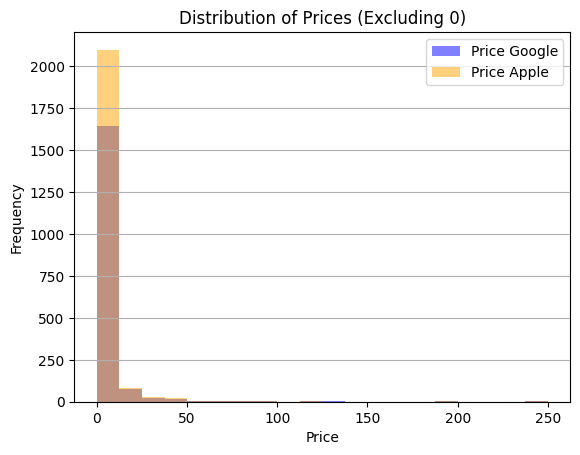

In [ ]:
price_google_filtered = df_ready[df_ready['Price_google'] != 0]['Price_google']
price_apple_filtered = df_ready[df_ready['Price_apple'] != 0]['Price_apple']

plt.hist(price_google_filtered, bins=20, range=(0, 250), alpha=0.5, label='Price Google', color='blue')

plt.hist(price_apple_filtered, bins=20, range=(0, 250), alpha=0.5, label='Price Apple', color='orange')

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices (Excluding 0)')
plt.legend()
plt.grid(axis='y')
plt.show()

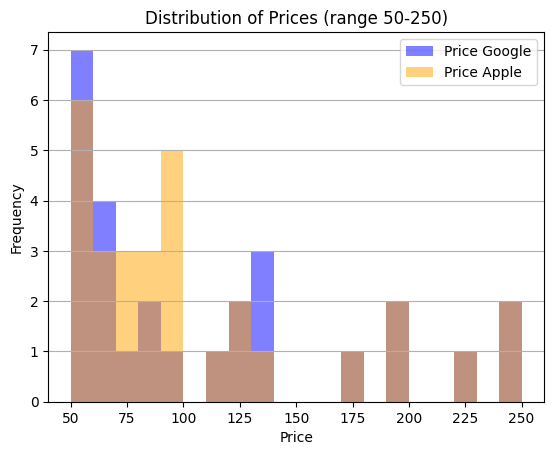

In [ ]:
price_google_filtered = df_ready[df_ready['Price_google'] != 0]['Price_google']
price_apple_filtered = df_ready[df_ready['Price_apple'] != 0]['Price_apple']

plt.hist(price_google_filtered, bins=20, range=(50, 250), alpha=0.5, label='Price Google', color='blue')

plt.hist(price_apple_filtered, bins=20, range=(50, 250), alpha=0.5, label='Price Apple', color='orange')

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices (range 50-250)')
plt.legend()
plt.grid(axis='y')
plt.show()

In [ ]:
non_zero_prices_google = df_ready[df_ready['Price_google'] != 0]['Price_google']
non_zero_prices_apple = df_ready[df_ready['Price_apple'] != 0]['Price_apple']

max_price_google = non_zero_prices_google.max()
min_price_google = non_zero_prices_google.min()

max_price_apple = non_zero_prices_apple.max()
min_price_apple = non_zero_prices_apple.min()

print("Google Play Store:")
print("Highest non-zero price:", max_price_google)
print("Lowest non-zero price:", min_price_google)

print("\nApple App Store:")
print("Highest non-zero price:", max_price_apple)
print("Lowest non-zero price:", min_price_apple)


Google Play Store:
Highest non-zero price: 349.99
Lowest non-zero price: 0.99

Apple App Store:
Highest non-zero price: 349.99
Lowest non-zero price: 0.99


In [ ]:
num_zero_prices_google = (df_ready['Price_google'] == 0).sum()
num_non_zero_prices_google = (df_ready['Price_google'] != 0).sum()

num_zero_prices_apple = (df_ready['Price_apple'] == 0).sum()
num_non_zero_prices_apple = (df_ready['Price_apple'] != 0).sum()

print("Google Play Store:")
print("Number of zero-priced apps:", num_zero_prices_google)
print("Number of non-zero-priced apps:", num_non_zero_prices_google)

print("\nApple App Store:")
print("Number of zero-priced apps:", num_zero_prices_apple)
print("Number of non-zero-priced apps:", num_non_zero_prices_apple)


print("\nTotal Number of zero-priced apps:", num_zero_prices_apple+num_zero_prices_google)
print("Total Number of non-zero-priced apps:", num_non_zero_prices_apple+num_non_zero_prices_google)


Google Play Store:
Number of zero-priced apps: 95397
Number of non-zero-priced apps: 1786

Apple App Store:
Number of zero-priced apps: 94919
Number of non-zero-priced apps: 2264

Total Number of zero-priced apps: 190316
Total Number of non-zero-priced apps: 4050


Total Number of Free Apps

In [ ]:
total_free_apps_google = df_ready['Free_google'].sum()
total_free_apps_apple = df_ready['Free_apple'].sum()
print("\nTotal Number of Free Apps on Google Play:", total_free_apps_google)
print("Total Number of Free Apps on Apple App Store:", total_free_apps_apple)


Total Number of Free Apps on Google Play: 95397
Total Number of Free Apps on Apple App Store: 94919


Checking consistency between "Price" and "Free"

*where Price is 0.0 Free should be true*

There are no inconsistencies between 'Free' and 'Price' columns.


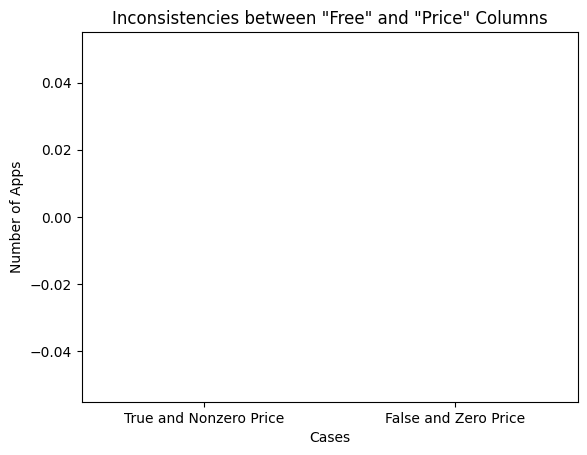

In [ ]:
free_true_nonzero_price = df_ready[(df_ready['Free_google']) & (df_ready['Price_google'] != 0.0)]

free_false_zero_price = df_ready[(~df_ready['Free_google']) & (df_ready['Price_google'] == 0.0)]

if free_true_nonzero_price.empty and free_false_zero_price.empty:
    print("There are no inconsistencies between 'Free' and 'Price' columns.")
else:
    print("Inconsistencies found:")
    if not free_true_nonzero_price.empty:
        print("\nFor 'Free' as True and 'Price' not equal to 0.0:")
        print(free_true_nonzero_price)
    if not free_false_zero_price.empty:
        print("\nFor 'Free' as False and 'Price' equal to 0.0:")
        print(free_false_zero_price)

plt.bar(['True and Nonzero Price', 'False and Zero Price'], [len(free_true_nonzero_price), len(free_false_zero_price)], color=['blue', 'orange'])
plt.xlabel('Cases')
plt.ylabel('Number of Apps')
plt.title('Inconsistencies between "Free" and "Price" Columns')
plt.show()

Market Share Analysis

In [ ]:
market_share_google = total_free_apps_google / len(df_ready) * 100
market_share_apple = total_free_apps_apple / len(df_ready) * 100
print("\nMarket Share of Free Apps on Google Play: {:.2f}%".format(market_share_google))
print("Market Share of Free Apps on Apple App Store: {:.2f}%".format(market_share_apple))


Market Share of Free Apps on Google Play: 98.16%
Market Share of Free Apps on Apple App Store: 97.67%


### Distrbution of Rating

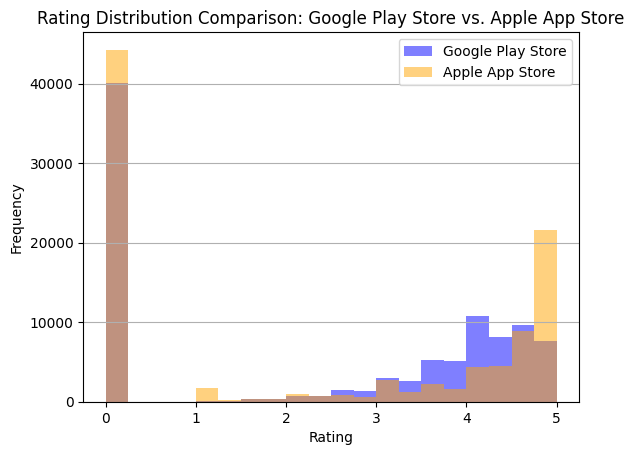

In [ ]:
fig, ax = plt.subplots()

plt.hist(df_ready['Rating_google'], bins=20, range=(0, 5), alpha=0.5, label='Google Play Store', color='blue')

plt.hist(df_ready['Average_User_Rating_apple'], bins=20, range=(0, 5), alpha=0.5, label='Apple App Store', color='orange')

plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating Distribution Comparison: Google Play Store vs. Apple App Store')
plt.legend()
plt.grid(axis='y')
plt.show()

In [ ]:
max_rating_google = df_ready['Rating_google'].max()
max_rating_app_google = df_ready.loc[df_ready['Rating_google'] == max_rating_google, 'App Name_google'].iloc[0]

max_rating_apple = df_ready['Average_User_Rating_apple'].max()
max_rating_app_apple = df_ready.loc[df_ready['Average_User_Rating_apple'] == max_rating_apple, 'App_Name_apple'].iloc[0]

print("App with the highest rating on Google Play Store:", max_rating_app_google)
print("Highest rating on Google Play Store:", max_rating_google)
print()
print("App with the highest rating on Apple App Store:", max_rating_app_apple)
print("Highest rating on Apple App Store:", max_rating_apple)


App with the highest rating on Google Play Store: Buzzer Beater
Highest rating on Google Play Store: 5.0

App with the highest rating on Apple App Store: RePlayer
Highest rating on Apple App Store: 5.0


The most rated categories on google play

In [ ]:
count_rating_by_category = df_ready.groupby('Category_google')['Rating_google'].count()
count_rating_by_category_sorted = count_rating_by_category.sort_values(ascending=False)
first_line = count_rating_by_category_sorted.index[0]
formatted_output = count_rating_by_category_sorted.to_string(header=False).replace(first_line, f"\033[1m{first_line}\033[0m", 1)
print(formatted_output)


Business                   9510
Education                  7648
Health & Fitness           6558
Lifestyle                  6168
Finance                    5832
Productivity               4642
Food & Drink               4565
Travel & Local             4346
Sports                     3607
Shopping                   3421
Tools                      3312
Medical                    2991
Entertainment              2956
Puzzle                     2706
Casual                     2155
Arcade                     2081
News & Magazines           2061
Social                     1918
Communication              1876
Educational                1676
Music & Audio              1642
Action                     1401
Simulation                 1298
Books & Reference          1274
Maps & Navigation          1201
Auto & Vehicles             958
Events                      872
Adventure                   842
House & Home                822
Card                        777
Role Playing                668
Board   

The most rated categories on apple store

In [ ]:
count_rating_by_genre = df_ready.groupby('Primary_Genre_apple')['Average_User_Rating_apple'].count()
count_rating_by_genre_sorted = count_rating_by_genre.sort_values(ascending=False)
first_line = count_rating_by_genre_sorted.index[0]
formatted_output = count_rating_by_genre_sorted.to_string(header=False).replace(first_line, f"\033[1m{first_line}\033[0m", 1)
print(formatted_output)

Games                     16220
Business                  11856
Education                  9179
Lifestyle                  6771
Health & Fitness           6521
Finance                    5720
Food & Drink               5249
Utilities                  4957
Productivity               4422
Travel                     4065
Entertainment              3625
Shopping                   3440
Sports                     3073
Medical                    2499
Social Networking          2194
News                       2020
Music                      1593
Reference                  1249
Navigation                  814
Photo & Video               651
Book                        633
Weather                     210
Magazines & Newspapers      123
Graphics & Design            65
Developer Tools              27
Stickers                      7


### Distribution of Free vs. Paid Apps

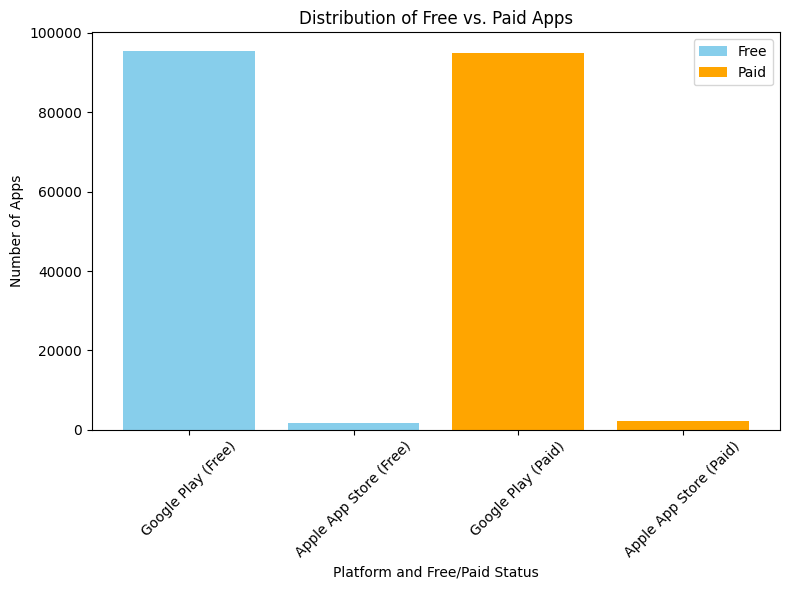

In [ ]:
free_count = df_ready['Free_google'].value_counts()
paid_count = df_ready['Free_apple'].value_counts()

fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(['Google Play (Free)', 'Apple App Store (Free)'], free_count.values, color='skyblue', label='Free')

ax.bar(['Google Play (Paid)', 'Apple App Store (Paid)'], paid_count.values, color='orange', label='Paid')

ax.set_xlabel('Platform and Free/Paid Status')
ax.set_ylabel('Number of Apps')
ax.set_title('Distribution of Free vs. Paid Apps')
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


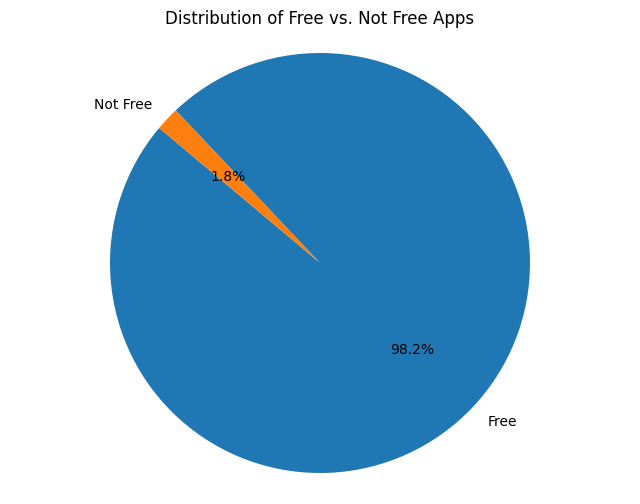

In [ ]:
free_apps_count = df_ready[df_ready['Free_google']].shape[0]
not_free_apps_count = df_ready[~df_ready['Free_google']].shape[0]

labels = ['Free', 'Not Free']
counts = [free_apps_count, not_free_apps_count]

plt.figure(figsize=(8, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Free vs. Not Free Apps')
plt.axis('equal')
plt.show()

### Average Ratings Comparison

In [ ]:
average_rating_google = df_ready['Rating_google'].mean()
average_rating_apple = df_ready['Average_User_Rating_apple'].mean()
print("Average app rating on Google Play:", average_rating_google)
print("Average app rating on Apple's App Store:", average_rating_apple)

Average app rating on Google Play: 2.3699937231820383
Average app rating on Apple's App Store: 2.293460830700843


In [ ]:
avg_ratings_google = df_ready.groupby('Free_google')['Rating_google'].mean()
print("Average Ratings for Google Play Apps:")
for is_free, avg_rating in avg_ratings_google.items():
    print(f"- {is_free}: {avg_rating}")

avg_ratings_apple = df_ready.groupby('Free_apple')['Average_User_Rating_apple'].mean()
print("\nAverage Ratings for Apple App Store Apps:")
for is_free, avg_rating in avg_ratings_apple.items():
    print(f"- {is_free}: {avg_rating}")

Average Ratings for Google Play Apps:
- False: 3.1067749160134377
- True: 2.356199880499387

Average Ratings for Apple App Store Apps:
- False: 3.1665661130742047
- True: 2.2726355969826906


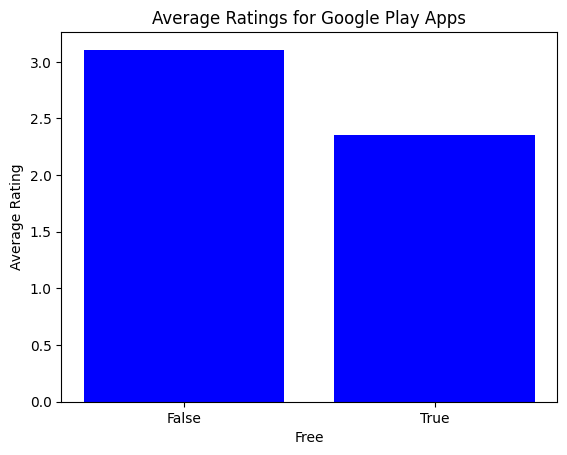

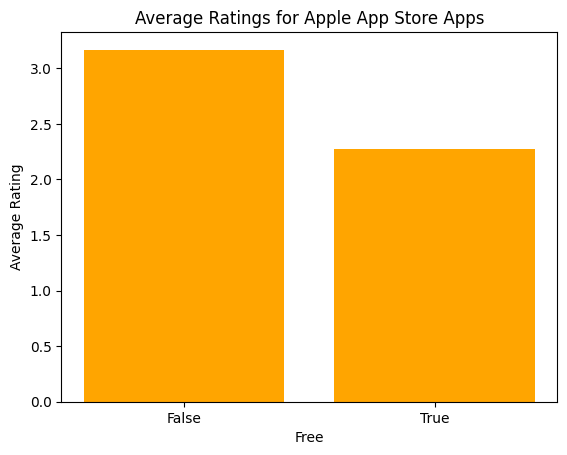

In [ ]:
avg_ratings_google = df_ready.groupby('Free_google')['Rating_google'].mean()
plt.bar(['False', 'True'], avg_ratings_google.values, color='blue')
plt.title('Average Ratings for Google Play Apps')
plt.xlabel('Free')
plt.ylabel('Average Rating')
plt.show()

avg_ratings_apple = df_ready.groupby('Free_apple')['Average_User_Rating_apple'].mean()
plt.bar(['False', 'True'], avg_ratings_apple.values, color='orange')
plt.title('Average Ratings for Apple App Store Apps')
plt.xlabel('Free')
plt.ylabel('Average Rating')
plt.show()


In [ ]:
combined_ratings = df_ready[['Rating_google', 'Average_User_Rating_apple']].stack().mean()
print("Overall Average Rating for Google Play and Apple App Store Apps Together:", combined_ratings)

Overall Average Rating for Google Play and Apple App Store Apps Together: 2.3317272769414403


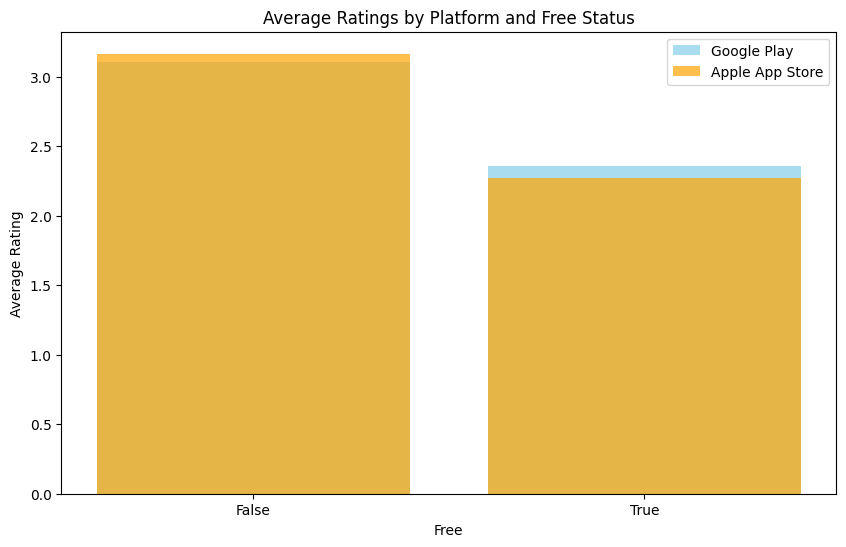

In [ ]:
avg_ratings_google = df_ready.groupby('Free_google')['Rating_google'].mean()

avg_ratings_apple = df_ready.groupby('Free_apple')['Average_User_Rating_apple'].mean()

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(avg_ratings_google.index.astype(str), avg_ratings_google.values, color='skyblue', label='Google Play', alpha=0.7)

ax.bar(avg_ratings_apple.index.astype(str), avg_ratings_apple.values, color='orange', label='Apple App Store', alpha=0.7)

ax.set_xlabel('Free')
ax.set_ylabel('Average Rating')
ax.set_title('Average Ratings by Platform and Free Status')
ax.legend()

plt.show()

### App Size Distribution

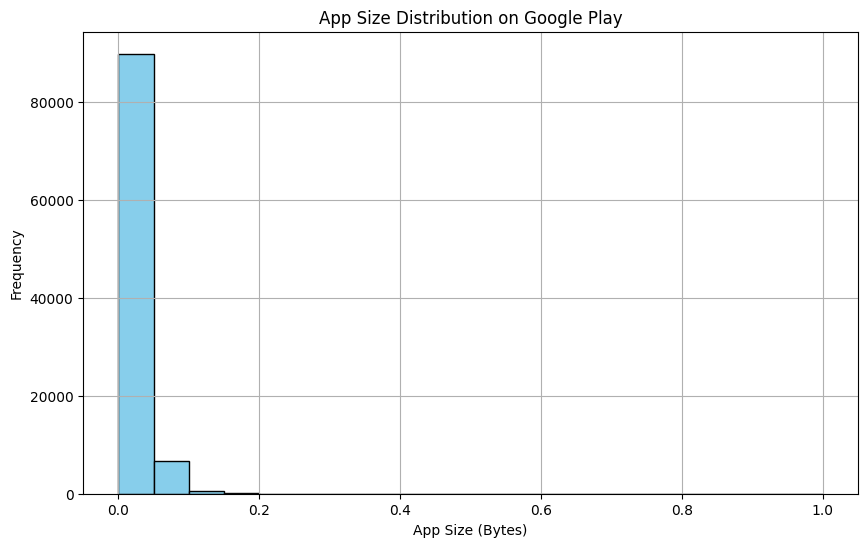

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_ready['Size_google_scaled'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('App Size (Bytes)')
plt.ylabel('Frequency')
plt.title('App Size Distribution on Google Play')
plt.grid(True)
plt.show()

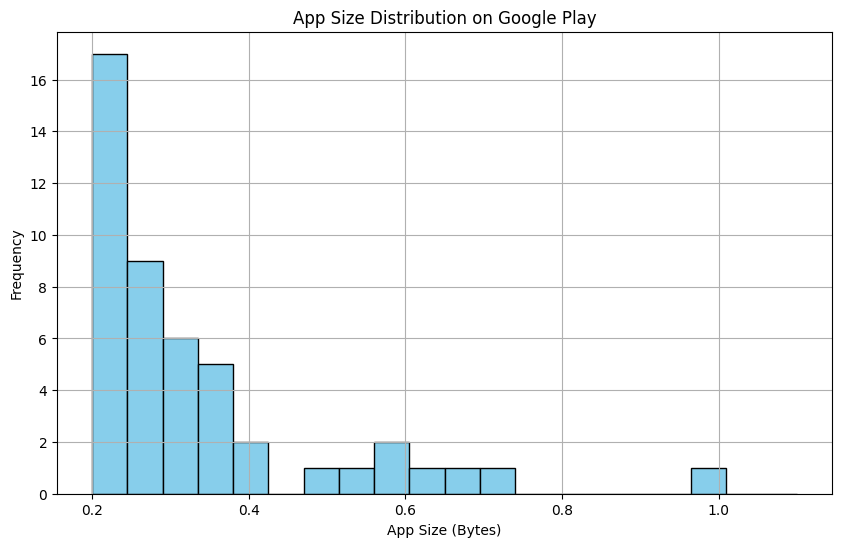

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_ready['Size_google_scaled'], bins=20, range=(0.2, 1.1), color='skyblue', edgecolor='black')
plt.xlabel('App Size (Bytes)')
plt.ylabel('Frequency')
plt.title('App Size Distribution on Google Play')
plt.grid(True)
plt.show()

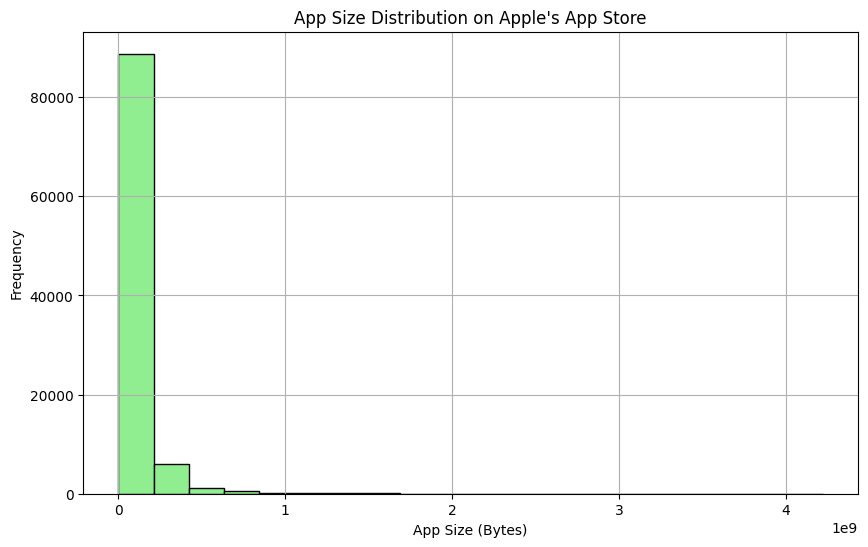

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_ready['Size_Bytes_apple'], bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('App Size (Bytes)')
plt.ylabel('Frequency')
plt.title("App Size Distribution on Apple's App Store")
plt.grid(True)
plt.show()

Max/Min size apps

In [ ]:
max_size_apple_index = df_ready['Size_Bytes_apple'].idxmax()
max_size_apple_app = df_ready.loc[max_size_apple_index, 'App_Name_apple']
max_size_apple_size = df_ready.loc[max_size_apple_index, 'Size_Bytes_apple']

min_size_apple_index = df_ready['Size_Bytes_apple'].idxmin()
min_size_apple_app = df_ready.loc[min_size_apple_index, 'App_Name_apple']
min_size_apple_size = df_ready.loc[min_size_apple_index, 'Size_Bytes_apple']

max_size_google_index = df_ready['Size_google_scaled'].idxmax()
max_size_google_app = df_ready.loc[max_size_google_index, 'App Name_google']
max_size_google_size = df_ready.loc[max_size_google_index, 'Size_google_scaled']

min_size_google_index = df_ready['Size_google_scaled'].idxmin()
min_size_google_app = df_ready.loc[min_size_google_index, 'App Name_google']
min_size_google_size = df_ready.loc[min_size_google_index, 'Size_google_scaled']

print("App with Maximum Size in Apple Dataset:", max_size_apple_app, "- Size:", max_size_apple_size)
print("App with Minimum Size in Apple Dataset:", min_size_apple_app, "- Size:", min_size_apple_size)
print("App with Maximum Size in Google Dataset:", max_size_google_app, "- Size:", max_size_google_size)
print("App with Minimum Size in Google Dataset:", min_size_google_app, "- Size:", min_size_google_size)


App with Maximum Size in Apple Dataset: DanMachi - MEMORIA FREESE - Size: 4221705216.0
App with Minimum Size in Apple Dataset: Smart Guard Control - Size: 260096.0
App with Maximum Size in Google Dataset: Titan Quest: Legendary Edition - Size: 1.0
App with Minimum Size in Google Dataset: Delta Ontario - Size: 0.0


In [ ]:
if min_size_apple_size < min_size_google_size:
    min_size_app = min_size_apple_app
    min_size = min_size_apple_size
    dataset = "Apple"
else:
    min_size_app = min_size_google_app
    min_size = min_size_google_size
    dataset = "Google"

if max_size_apple_size > max_size_google_size:
    max_size_app = max_size_apple_app
    max_size = max_size_apple_size
    dataset = "Apple"
else:
    max_size_app = max_size_google_app
    max_size = max_size_google_size
    dataset = "Google"

print("App with the Most Minimum Size:", min_size_app, "- Size:", min_size, "- Dataset:", dataset)
print("App with the Most Maximum Size:", max_size_app, "- Size:", max_size, "- Dataset:", dataset)


App with the Most Minimum Size: Delta Ontario - Size: 0.0 - Dataset: Apple
App with the Most Maximum Size: DanMachi - MEMORIA FREESE - Size: 4221705216.0 - Dataset: Apple


Average apps size on Google and Apple:

In [ ]:
average_app_size_google = df_ready['Size_google_scaled'].mean()
average_app_size_apple = df_ready['Size_Bytes_apple'].mean()
print("Average app size on Google Play:", average_app_size_google)
print("Average app size on Apple's App Store:", average_app_size_apple)

Average app size on Google Play: 0.02021374279782812
Average app size on Apple's App Store: 96641383.0345122


### 10 Top developers

In [ ]:
top_developers_google = df_ready['Developer Id_google'].value_counts().head(10)
top_developers_apple = df_ready['DeveloperId_apple'].value_counts().head(10)
print("Top developers on Google Play:")
print(top_developers_google)
print("\nTop developers on Apple's App Store:")
print(top_developers_apple)

Top developers on Google Play:
Developer Id_google
Branded Apps by MINDBODY    899
Vet2Pet                     673
Subsplash Inc               617
MINDBODY Branded Apps       520
app smart GmbH              486
Flipdish                    399
goPIZZAgo.de                278
inChurch                    220
Blackboard Inc.             219
Townsquare Media, Inc.      203
Name: count, dtype: int64

Top developers on Apple's App Store:
DeveloperId_apple
472317932     789
1476391440    278
989137255     208
433762450     203
349276666     150
979370041     150
806182439     132
306716521     127
818609416     125
444343830     114
Name: count, dtype: int64


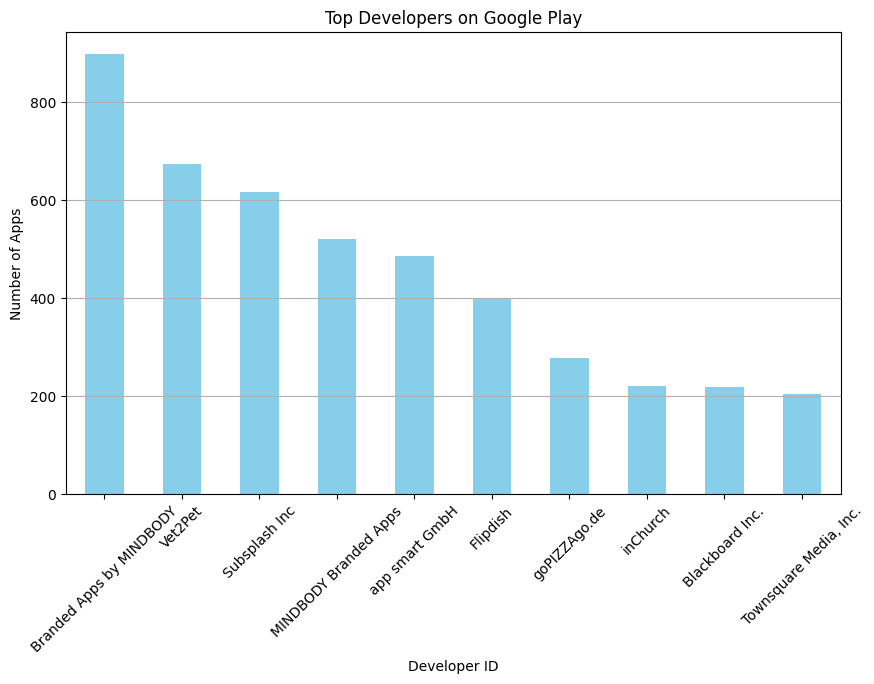

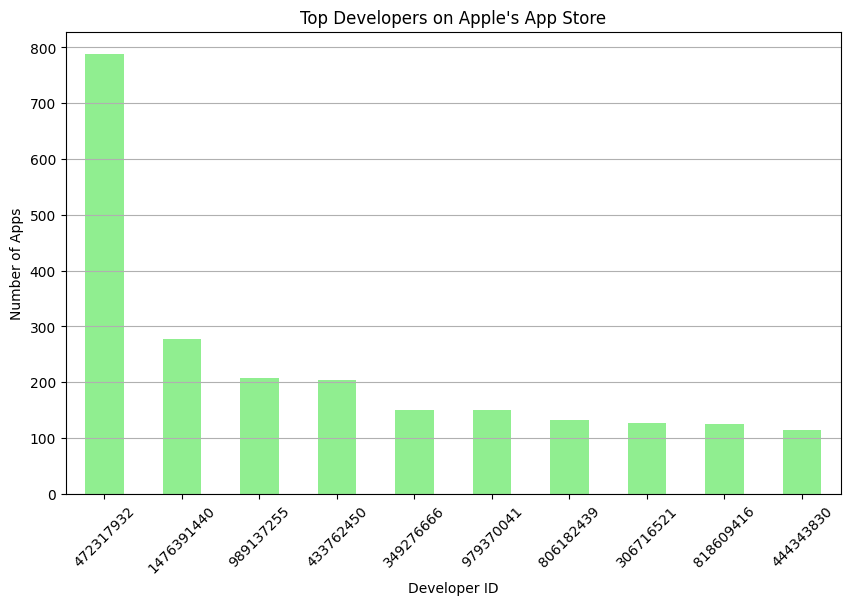

In [ ]:
plt.figure(figsize=(10, 6))
top_developers_google.plot(kind='bar', color='skyblue')
plt.title('Top Developers on Google Play')
plt.xlabel('Developer ID')
plt.ylabel('Number of Apps')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10, 6))
top_developers_apple.plot(kind='bar', color='lightgreen')
plt.title("Top Developers on Apple's App Store")
plt.xlabel('Developer ID')
plt.ylabel('Number of Apps')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


### Number of App Releases by Year

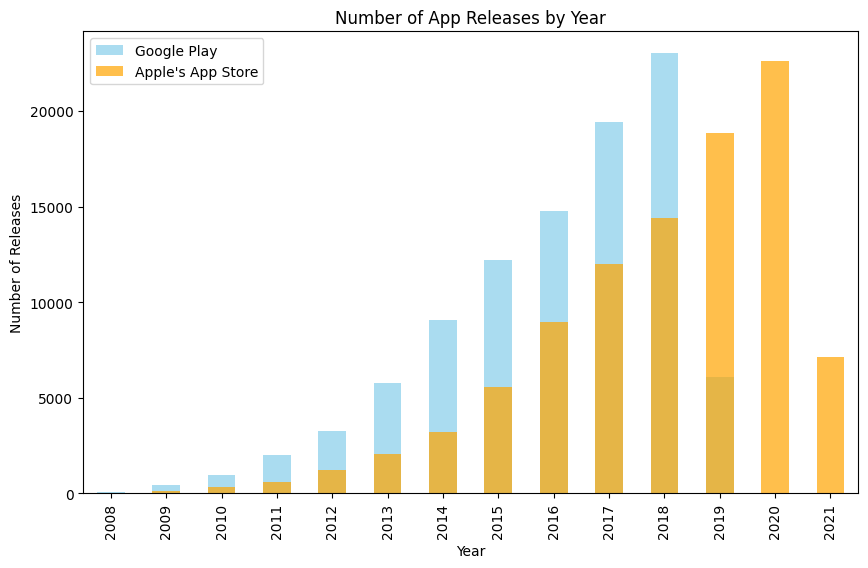

In [ ]:
df_ready['Released_google'] = pd.to_datetime(df_ready['Released_google'])
df_ready['Released_apple'] = pd.to_datetime(df_ready['Released_apple'])

df_ready['Released_google_year'] = df_ready['Released_google'].dt.year
df_ready['Released_apple_year'] = df_ready['Released_apple'].dt.year

plt.figure(figsize=(10, 6))
df_ready['Released_google_year'].value_counts().sort_index().plot(kind='bar', color='skyblue', alpha=0.7, label='Google Play')
df_ready['Released_apple_year'].value_counts().sort_index().plot(kind='bar', color='orange', alpha=0.7, label="Apple's App Store")
plt.title('Number of App Releases by Year')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.legend()
plt.show()

### Category-wise App Count
 how the distribution of apps across different categories on both Google Play and Apple's App Store

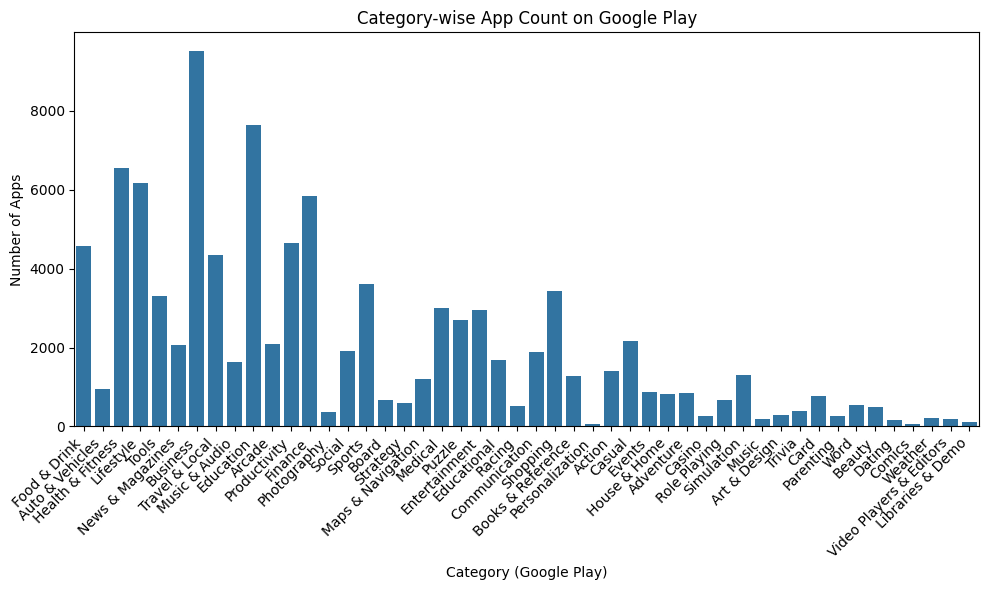

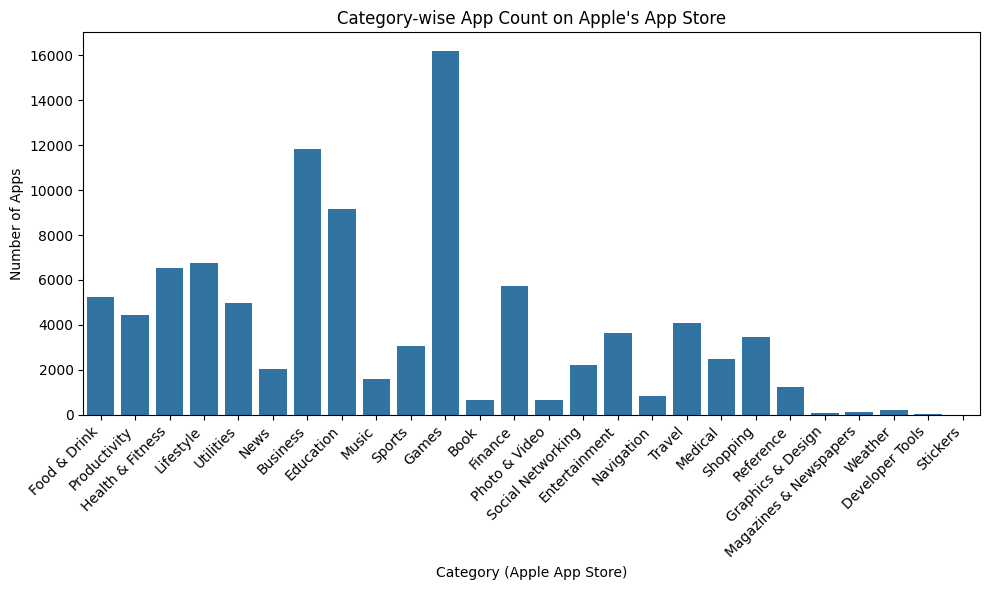

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_ready, x='Category_google')
plt.xlabel('Category (Google Play)')
plt.ylabel('Number of Apps')
plt.title('Category-wise App Count on Google Play')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df_ready, x='Primary_Genre_apple')
plt.xlabel('Category (Apple App Store)')
plt.ylabel('Number of Apps')
plt.title("Category-wise App Count on Apple's App Store")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
top_categories_google = df_ready['Category_google'].value_counts().head(3)
top_categories_apple = df_ready['Primary_Genre_apple'].value_counts().head(3)
print("Top categories on Google Play:")
print(top_categories_google)
print("\nTop categories on Apple's App Store:")
print(top_categories_apple)

Top categories on Google Play:
Category_google
Business            9510
Education           7648
Health & Fitness    6558
Name: count, dtype: int64

Top categories on Apple's App Store:
Primary_Genre_apple
Games        16220
Business     11856
Education     9179
Name: count, dtype: int64


### App Names

Find Names That Are Not the Same in Both Columns:

In [ ]:
df_ready['Names_Not_Same'] = (df_ready['App Name_google'] != df_ready['App_Name_apple']).astype(int)
num_names_not_same = df_ready['Names_Not_Same'].sum()
print(f"Number of names not the same in both columns: {num_names_not_same}")

Number of names not the same in both columns: 30793


Add an Average App Name Length Column:

In [ ]:
df_ready['Av_App_name_length'] = (df_ready['App Name_google'].str.len() + df_ready['App_Name_apple'].str.len()) / 2

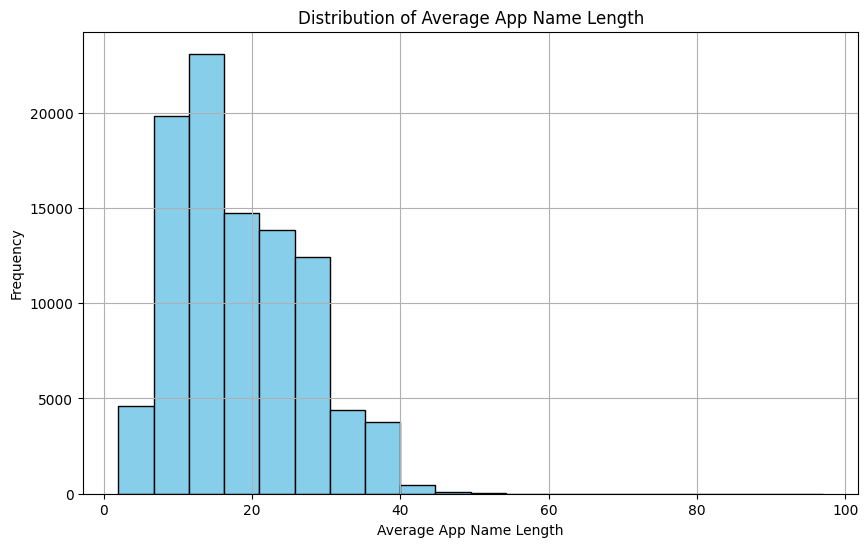

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_ready['Av_App_name_length'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Average App Name Length')
plt.ylabel('Frequency')
plt.title('Distribution of Average App Name Length')
plt.grid(True)
plt.show()

In [ ]:
longest_name_google = df_ready.loc[df_ready['App_Name_apple'].str.len().idxmax(), 'App_Name_apple']
longest_name_length_google = len(longest_name_google)

shortest_name_google = df_ready.loc[df_ready['App_Name_apple'].str.len().idxmin(), 'App_Name_apple']
shortest_name_length_google = len(shortest_name_google)

longest_name_apple = df_ready.loc[df_ready['App_Name_apple'].str.len().idxmax(), 'App_Name_apple']
longest_name_length_apple = len(longest_name_apple)

shortest_name_apple = df_ready.loc[df_ready['App_Name_apple'].str.len().idxmin(), 'App_Name_apple']
shortest_name_length_apple = len(shortest_name_apple)

print("Longest App Name in Google Play:", longest_name_google)
print("Length:", longest_name_length_google)
print("\nShortest App Name in Google Play:", shortest_name_google)
print("Length:", shortest_name_length_google)
print("\nLongest App Name in Apple's App Store:", longest_name_apple)
print("Length:", longest_name_length_apple)
print("\nShortest App Name in Apple's App Store:", shortest_name_apple)
print("Length:", shortest_name_length_apple)

Longest App Name in Google Play: Best Credit Card Reader & Swiper App - Process Credit Cards Fast on Your Mobile Phone with this Point of Sale (POS) System - Download Now for Free
Length: 146

Shortest App Name in Google Play: FD
Length: 2

Longest App Name in Apple's App Store: Best Credit Card Reader & Swiper App - Process Credit Cards Fast on Your Mobile Phone with this Point of Sale (POS) System - Download Now for Free
Length: 146

Shortest App Name in Apple's App Store: FD
Length: 2


## Correlations beteen features

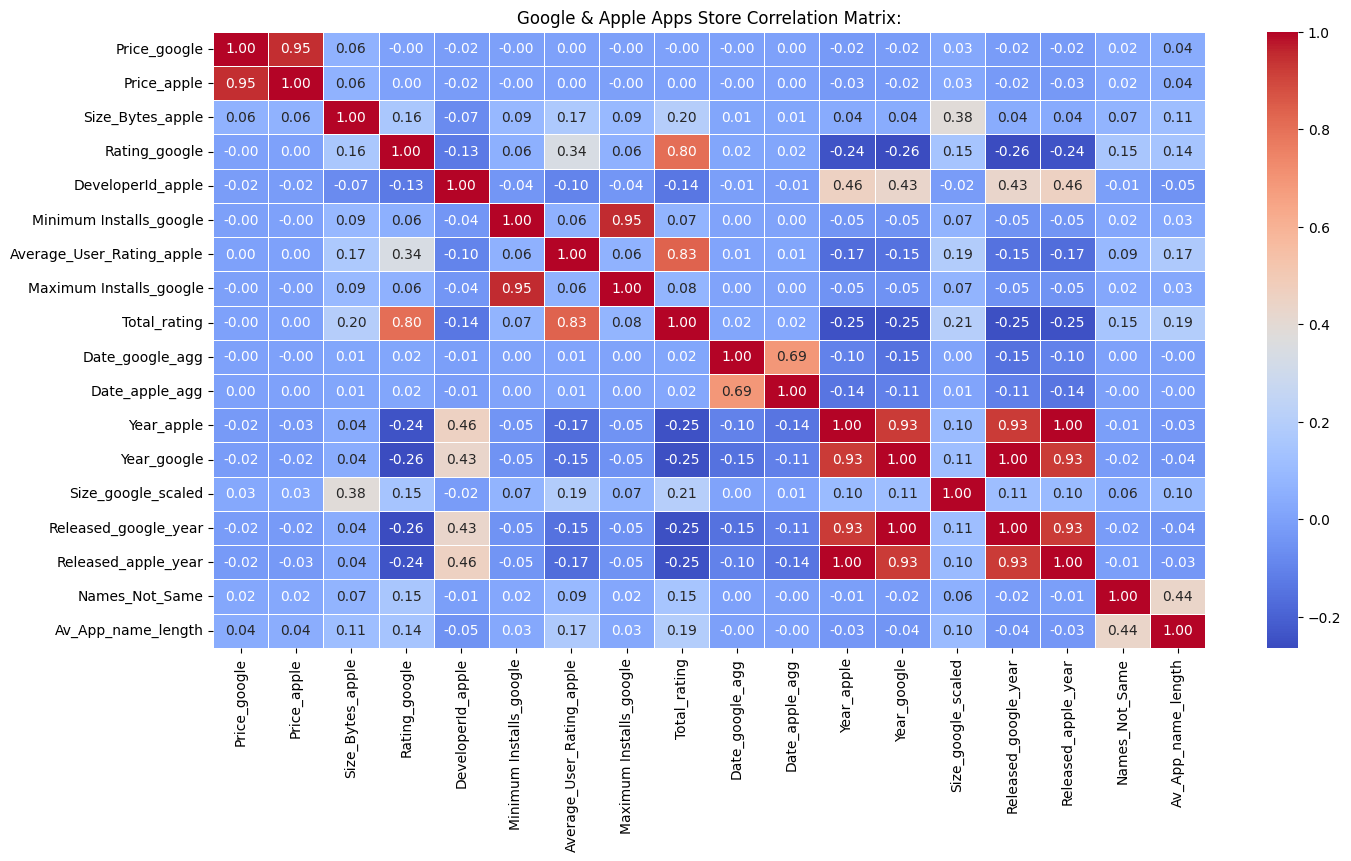

In [ ]:
numeric_df = df_ready.select_dtypes(include=['float64', 'int64', 'int32'])

plt.figure(figsize=(16, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Google & Apple Apps Store Correlation Matrix:')
plt.show()

## Most influential features

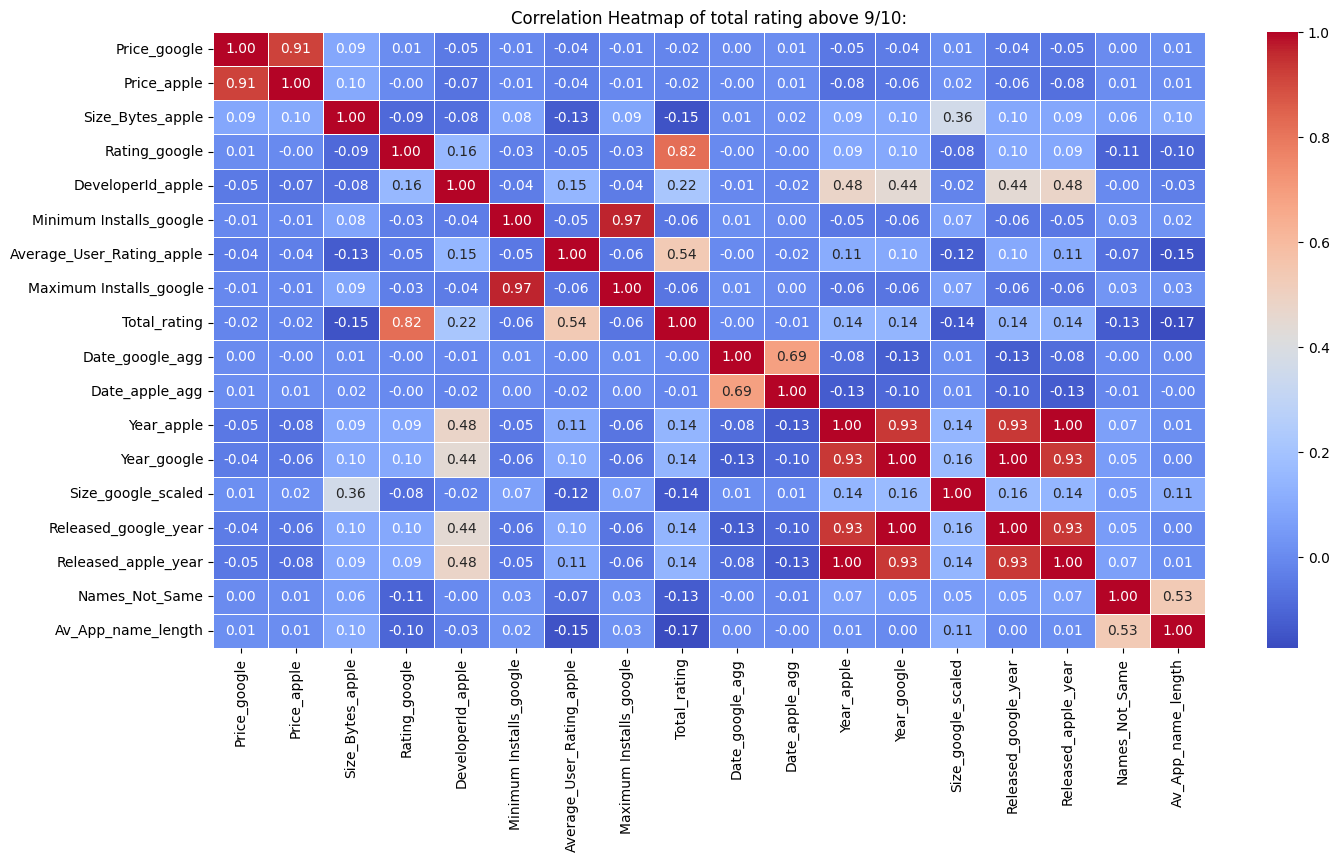

In [ ]:
filtered_df = df_ready[df_ready['Total_rating'] > 9]

numeric_filtered_df = filtered_df.select_dtypes(include=['float64', 'int64', 'int32'])

plt.figure(figsize=(16, 8))
sns.heatmap(numeric_filtered_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of total rating above 9/10:')
plt.show()

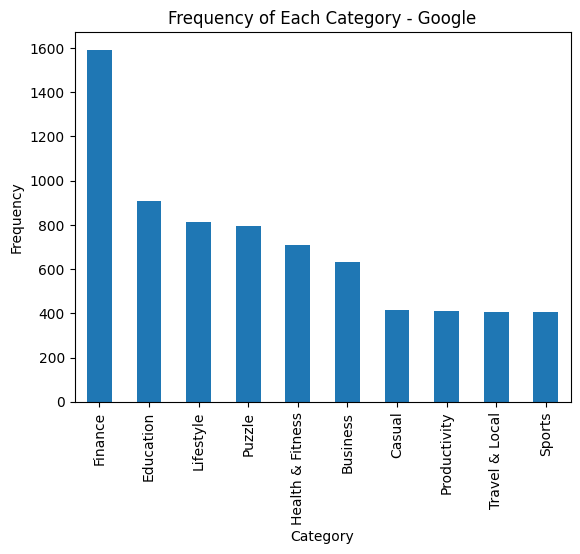

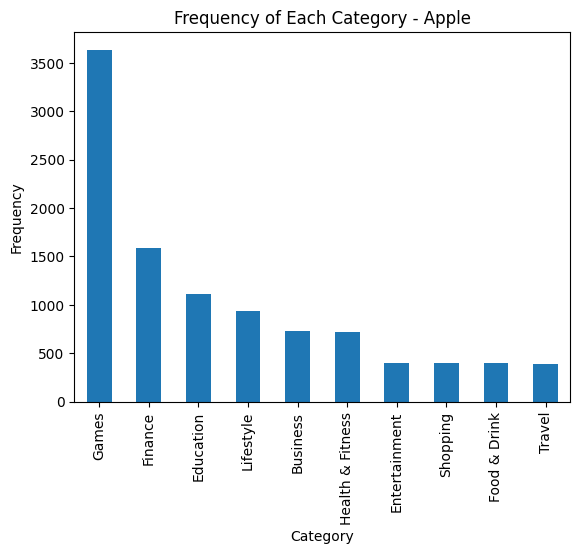

In [ ]:
top_n = 10

value_counts = filtered_df['Category_google'].value_counts()

value_counts_top_n = value_counts.head(top_n)

value_counts_top_n.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Frequency of Each Category - Google')
plt.show()

value_counts = filtered_df['Primary_Genre_apple'].value_counts()

value_counts_top_n = value_counts.head(top_n)

value_counts_top_n.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Frequency of Each Category - Apple')
plt.show()

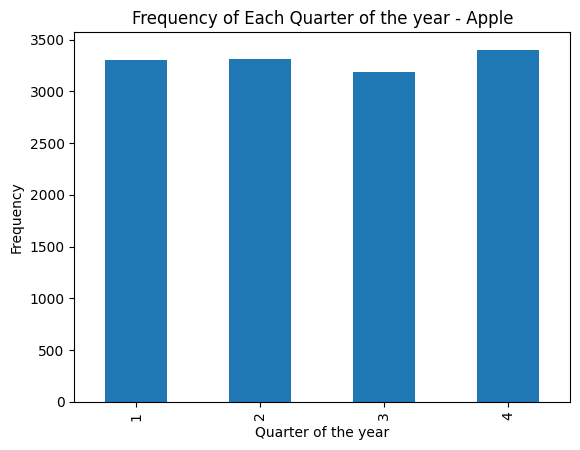

In [ ]:
value_counts = filtered_df['Date_apple_agg'].value_counts().sort_index()

value_counts.plot(kind='bar')
plt.xlabel('Quarter of the year')
plt.ylabel('Frequency')
plt.title('Frequency of Each Quarter of the year - Apple')
plt.show()

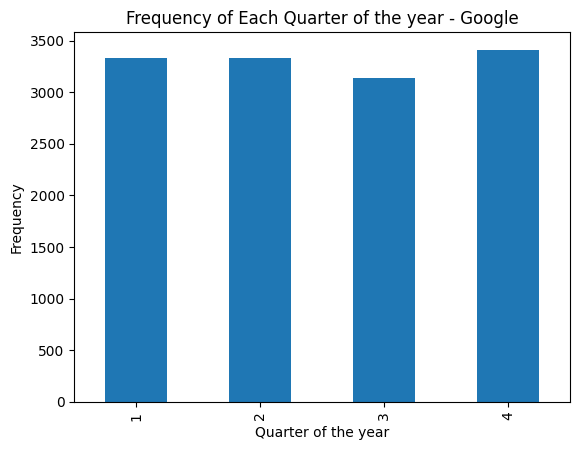

In [ ]:
value_counts = filtered_df['Date_google_agg'].value_counts().sort_index()

value_counts.plot(kind='bar')
plt.xlabel('Quarter of the year')
plt.ylabel('Frequency')
plt.title('Frequency of Each Quarter of the year - Google')
plt.show()